Attempt to implement Legendre-Fenchel transform algorithm by Y. Lucet (1997)

In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# convex hull

def convex_hull(x, y):
    l = [(0, -np.Inf)]
    
    for j, (cx, cy) in enumerate(zip(x[1:],y[1:])):
        while True:
            pi, ps = l[-1]
            s = (cy - y[pi]) / (cx - x[pi])
            if s <= ps:
                del l[-1]
            else:
                l.append((j+1, s))
                break
        
    
    return [i for i, _ in l], [s for _, s in l[1:]]

In [3]:
convex_hull([1,2,3,4, 5], [0, 1, -2, 1, 0])

([0, 2, 4], [-1.0, 1.0])

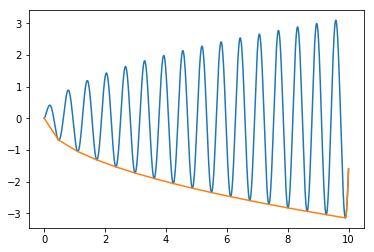

In [4]:
x = np.linspace(0, 10, 10000)
y = np.sin(10 * x) * x**0.5

plt.plot(x, y)

i, _ = convex_hull(x, y)
plt.plot(x[i], y[i])


In [5]:
def lf(x, y, p):
    chi, s = convex_hull(x, y)
    s.append(np.Inf)

    t = []
    iopt = np.zeros_like(p, dtype=int)
    i = 0
    for j, p in enumerate(p):
        while p > s[i]:
            i += 1
        iopt[j] = chi[i]
        t.append(x[chi[i]] * p - y[chi[i]])
        
    return t, iopt

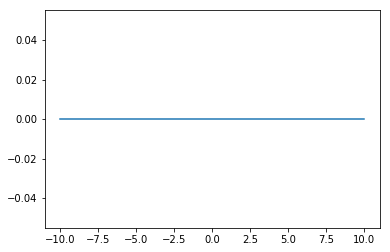

In [6]:
# Legendre-Fenchel is an identity for 0.5 x**2
x = np.linspace(-10, 10, 100)
y = 0.5*x**2

#plt.plot(x, y)

p = x
t, _ = lf(x, y, p)
#t, _ = lf(x, t, p)
plt.plot(p, t - y)


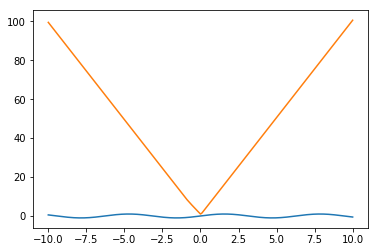

In [7]:
x = np.linspace(-10, 10, 1001)
y = np.sin(x)

plt.plot(x, y)

p = x
t, _ = lf(x, y, p)
plt.plot(p, t)


## c-transform

In [8]:
def c_transform(x, phi):
    psi = 0.5 * x * x - phi
    plt.plot(x, psi)
    t,xo = lf(x, psi, x)
    plt.plot(x, t)
    plt.show()
    
    return 0.5 * x * x - t, xo

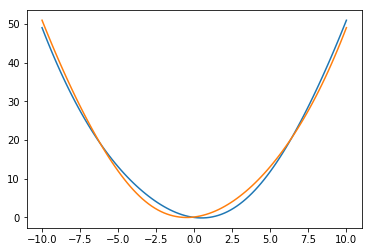

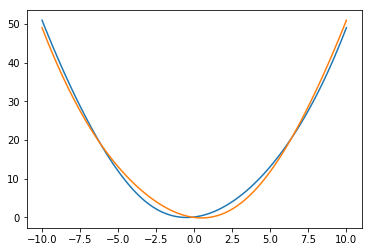

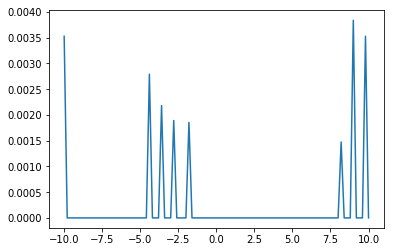

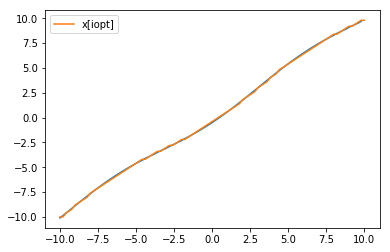

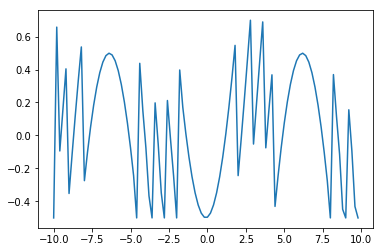

In [10]:
x = np.linspace(-10, 10, 101)
y = np.sin(0.5 * x)
#y = 0.5 * x * x
#y = np.random.random(len(x))

#plt.plot(x, y)

t, _ = c_transform(x, y)
#plt.plot(x, t)
t, iopt = c_transform(x, t)
plt.plot(x, t - y)
plt.show()

plt.plot(x[:-1], x[:-1] - (t[1:] - t[:-1]) / (x[1:] - x[:-1])) #- x[iopt][:-1])
plt.plot(x, x[iopt], label='x[iopt]')
plt.legend()
plt.show()
plt.plot(x[:-1], (x[:-1] - (t[1:] - t[:-1]) / (x[1:] - x[:-1])- x[iopt][:-1])/(x[1] - x[0]))



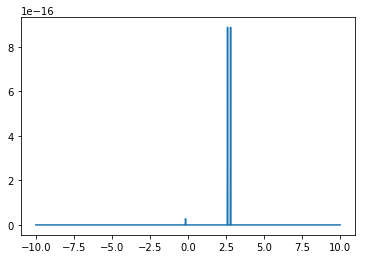

In [24]:
x = np.linspace(-10, 10, 1001)

y = np.random.random(len(x))
y = np.sin(0.5 * x)
#y = 0.5 * x * x
 
y, _ = c_transform(x, y)
t, iopt = c_transform(x, y)
#plt.plot(x, t)
t, _ = c_transform(x, t)

plt.plot(x, t - y)
#plt.plot(x[iopt])
#plt.plot(x[:-1] - (t[1:] - t[:-1]) / (x[1:] - x[:-1]))
#plt.plot(x[iopt][:-1] - (x[:-1] - (t[1:] - t[:-1]) / (x[1:] - x[:-1])))

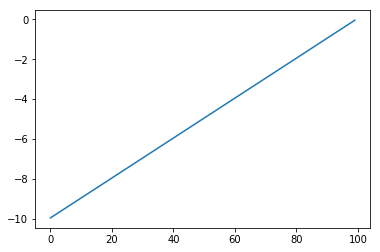

In [210]:
plt.plot((y[1:] - y[:-1]) / (x[1:] - x[:-1]))

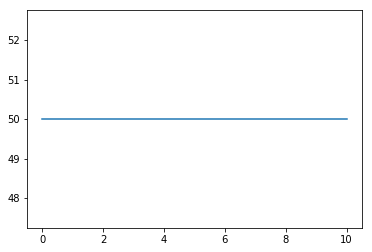

In [216]:
plt.plot(x, 0.5 * (x - 10)**2 - y)

In [217]:
xo[-1]

4.6000000000000005

## Solving $(-\Delta)u = f$ with Neumann boundary condition

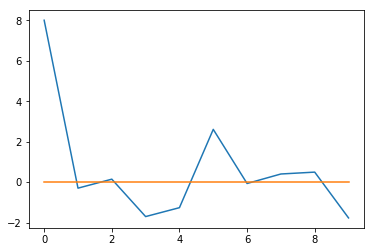

In [11]:
x = np.linspace(0, 1, 10)
y = np.cos(np.pi * x)
y = np.random.random(len(x))

# even periodic extension to get cosine series
py = np.concatenate((y, y[-2:0:-1]))

fy = np.fft.rfft(py)
plt.plot(np.real(fy))
iy = np.fft.irfft(fy)
plt.plot(iy[:len(y)] - y)

In [12]:
def lap_solve(f):
    """Solves (-\Delta)u = f with Neumann boundary condition on [0,1]. 
    f needs to be given at all nodes including the endpoints. The mean of f is set to zero."""
    # even periodic extension to get cosine series; imaginary part of the result will be zero
    pf = np.concatenate((f, f[-2:0:-1]))
    ff = np.fft.rfft(pf)
    xi = np.linspace(0, 1, len(f))
    N = len(f) - 1
    ff[0] = 0 # set mean to 0
    ff[1:] /= 4 * np.sin(0.5 * np.pi * xi[1:])**2 * N**2
    # perform inverse fft and remove the even periodic extension
    return np.fft.irfft(ff)[:len(f)]
    

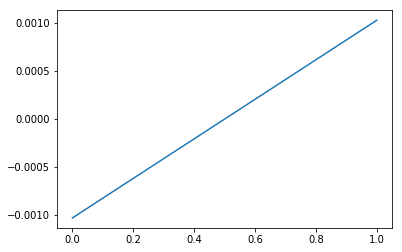

In [13]:
x = np.linspace(0, 1, 10)
f = x
u_ex = -(x - 0.5)**3/6 + (x-0.5) /8
u = lap_solve(f)
plt.plot(x, u-u_ex)

## Push-forward

In [14]:
def push_forward(mu, t):
    """t[i] is the index where t maps index i"""
    
    nu = np.zeros_like(mu)
    for i, t in enumerate(t):
        nu[t] += mu[i]
    return nu

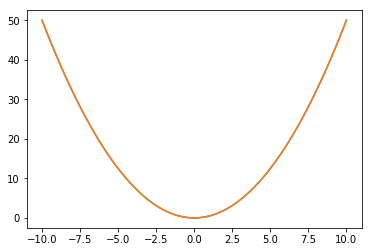

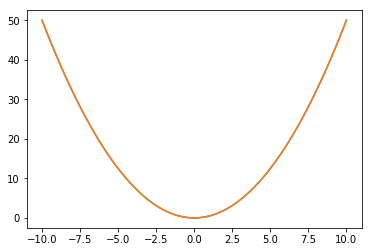

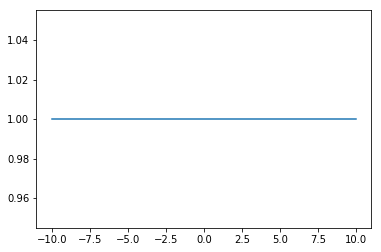

In [15]:
x = np.linspace(-10, 10, 1001)

#y = np.random.random(len(x))
#y = np.sin(0.5 * x)
#y = 0.5 * x * x
y = 0 * x
 
y, _ = c_transform(x, y)
t, iopt = c_transform(x, y)
#plt.plot(x, t)
#t, _ = c_transform(x, t)

mu = np.ones_like(x)
nu = push_forward(mu, iopt)

plt.plot(x, nu)
#plt.plot(x, lap_solve(nu - mu))

## Back and forth

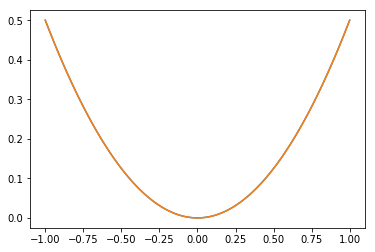

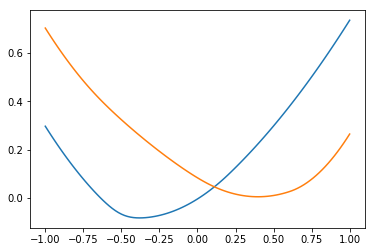

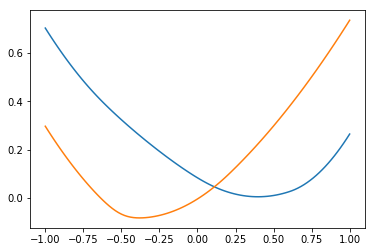

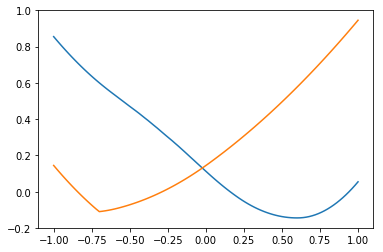

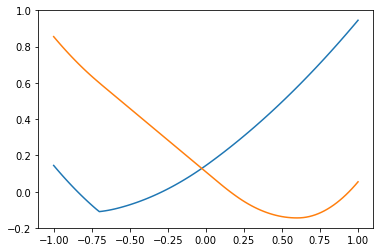

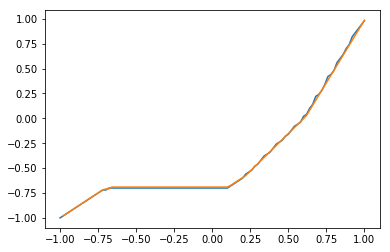

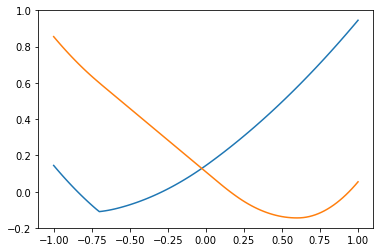

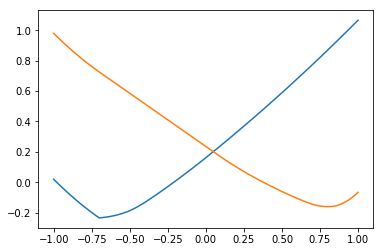

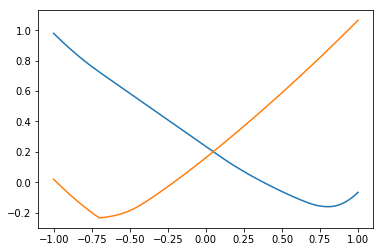

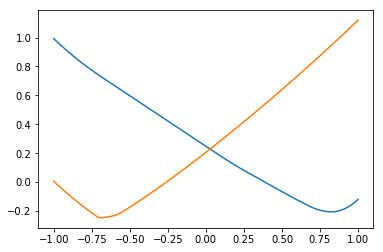

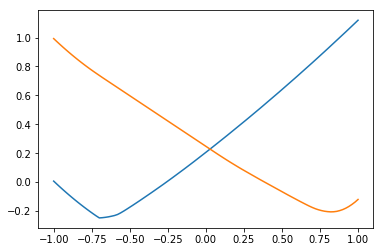

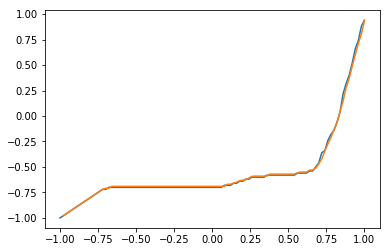

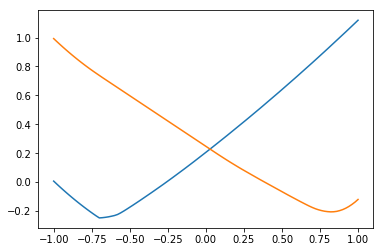

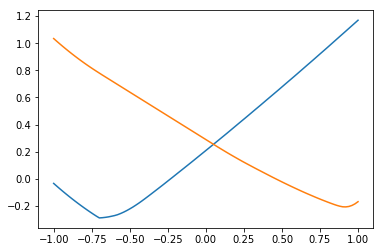

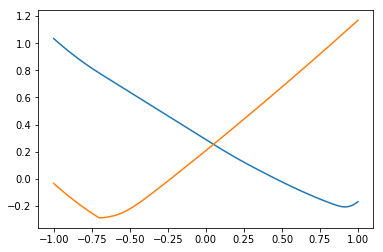

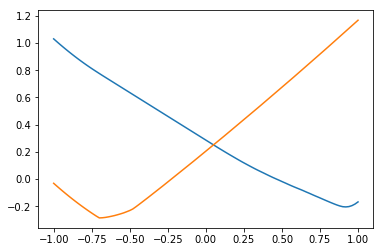

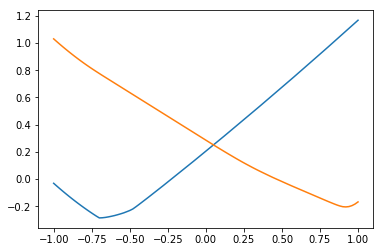

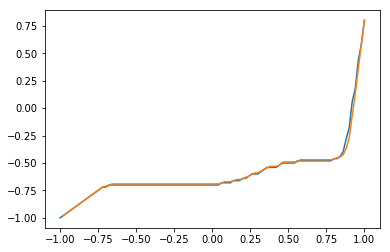

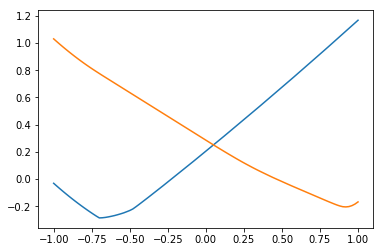

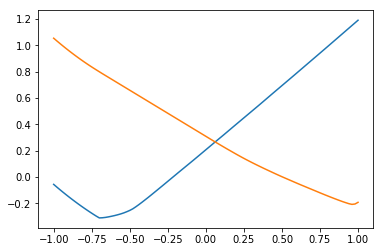

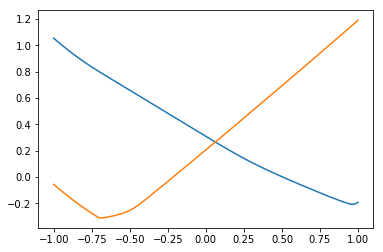

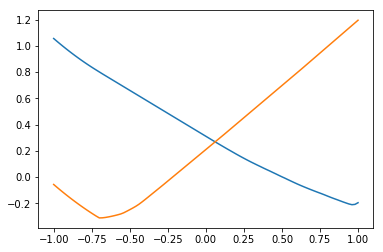

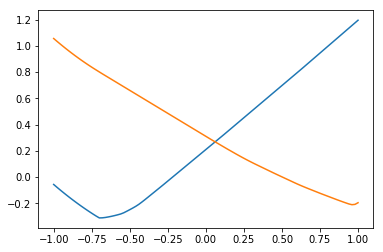

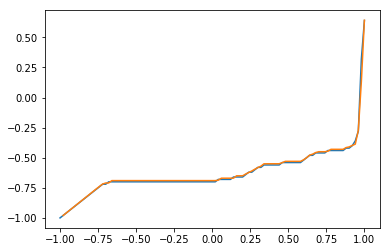

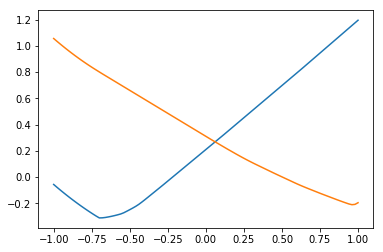

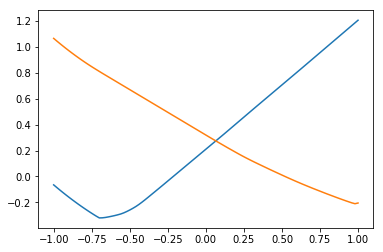

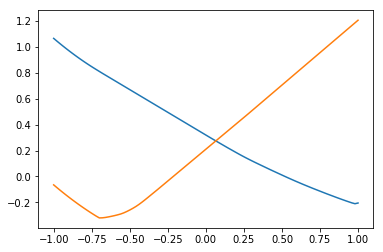

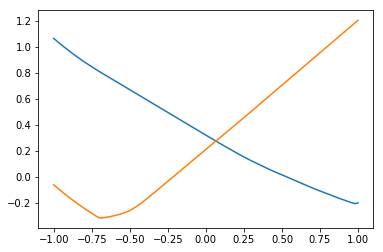

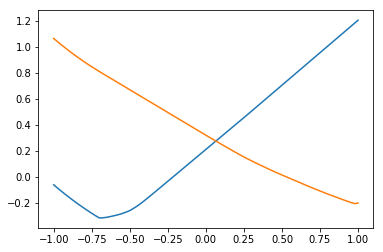

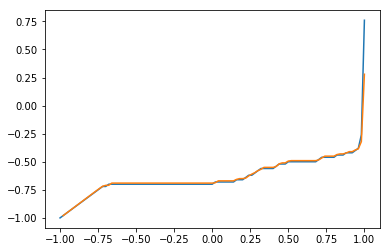

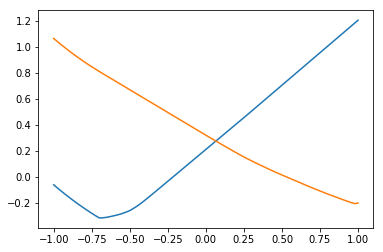

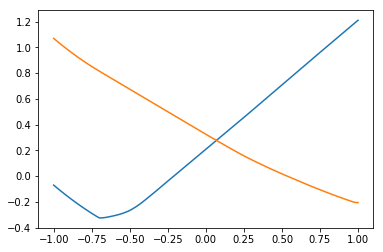

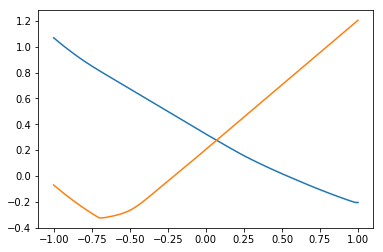

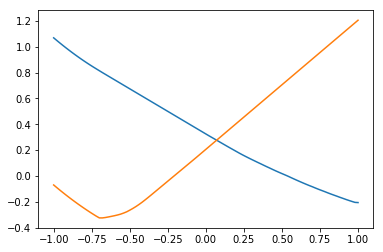

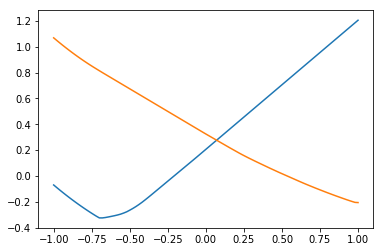

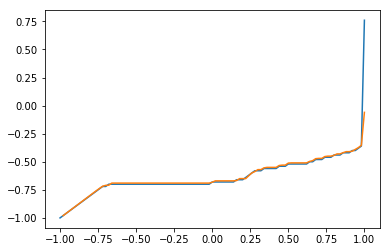

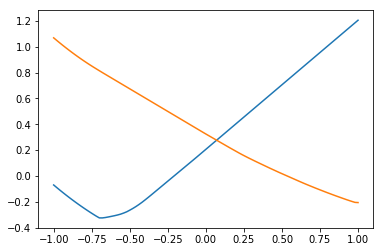

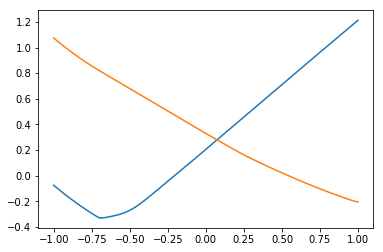

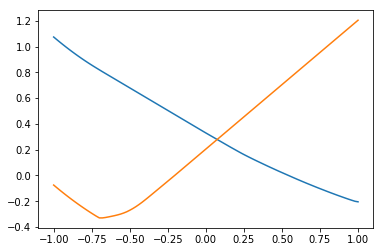

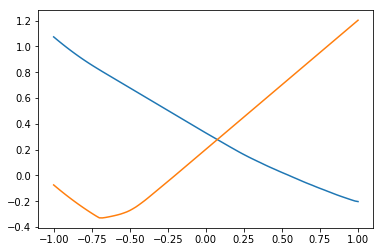

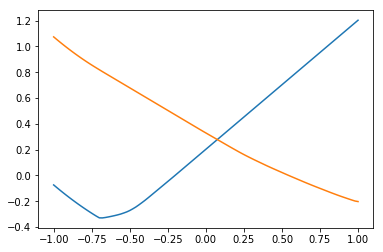

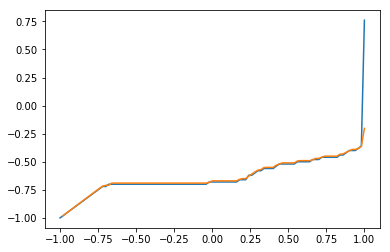

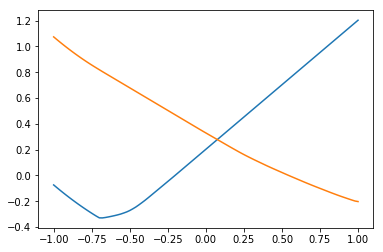

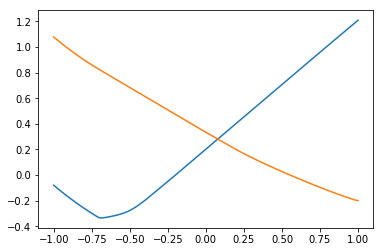

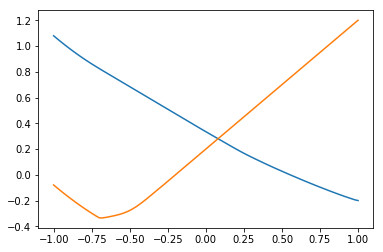

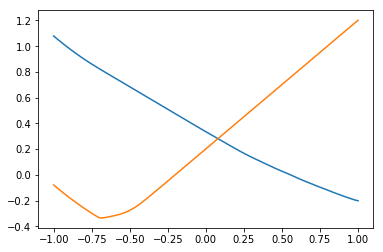

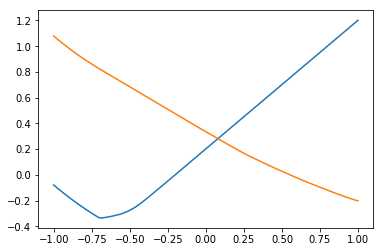

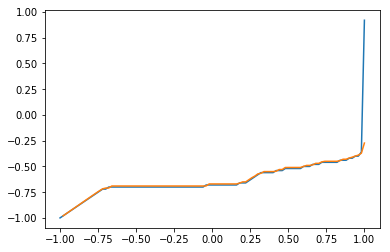

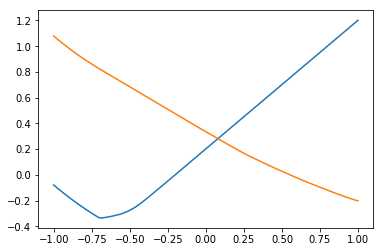

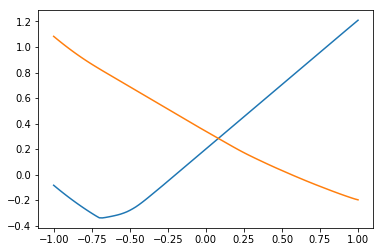

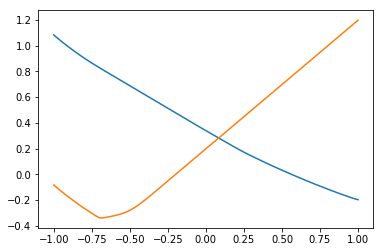

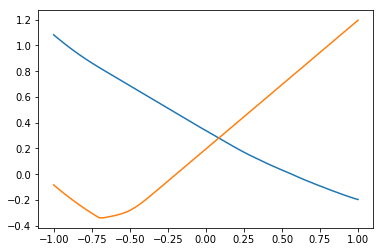

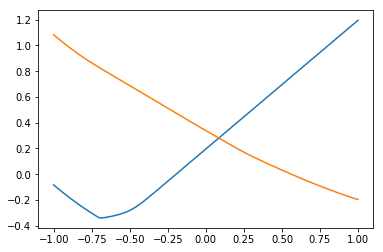

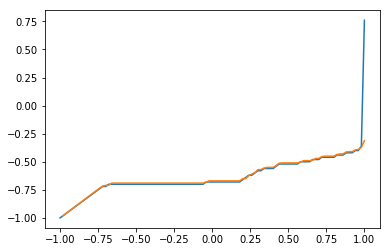

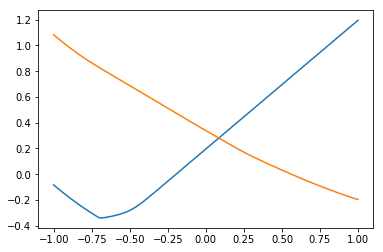

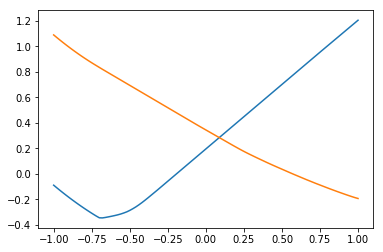

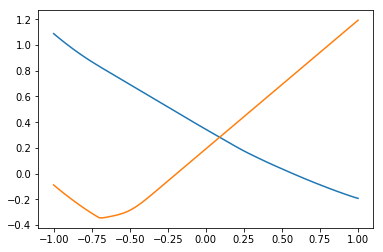

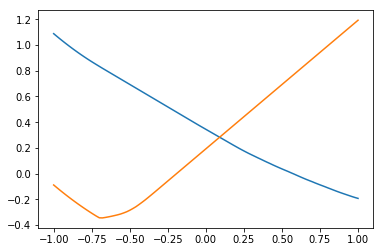

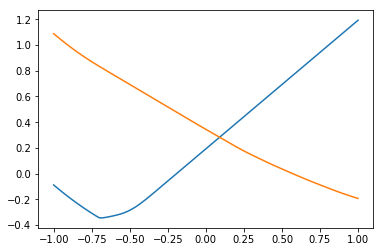

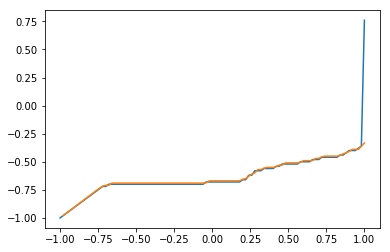

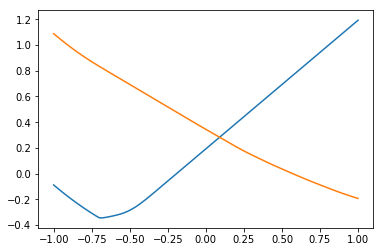

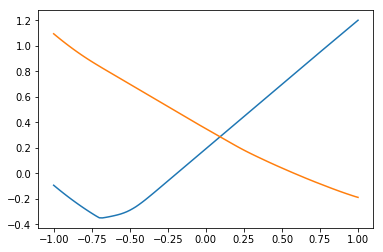

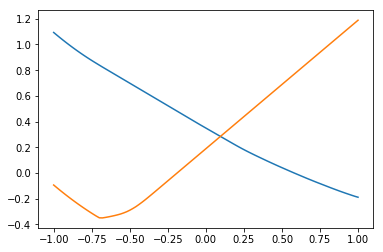

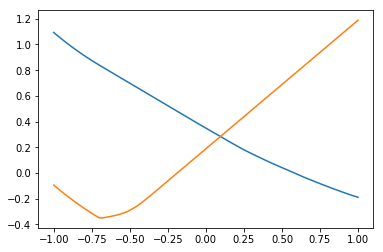

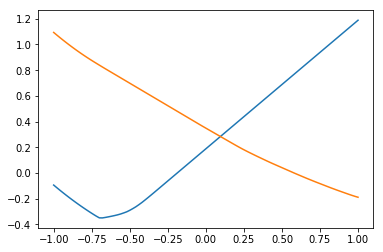

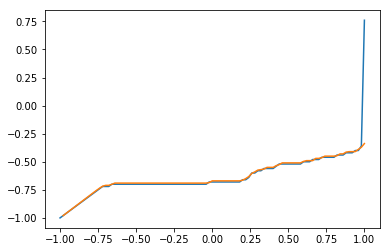

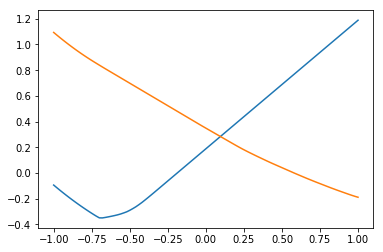

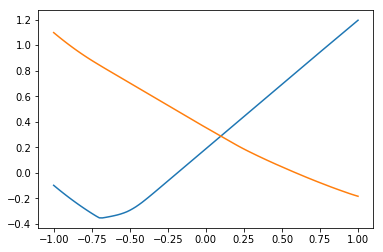

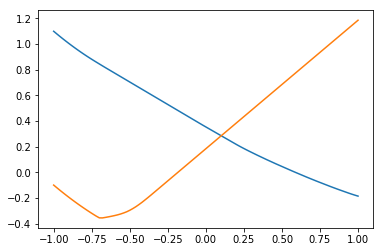

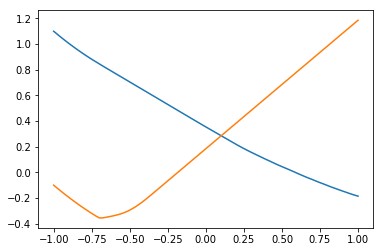

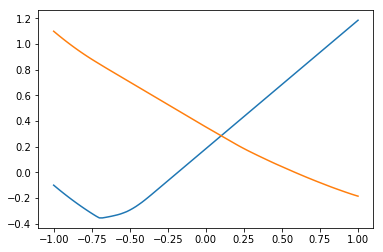

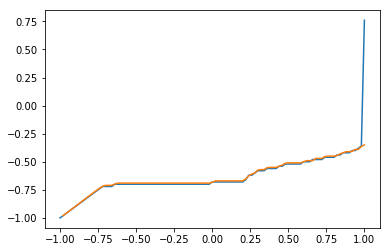

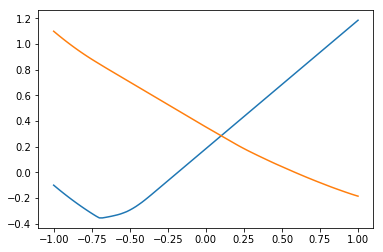

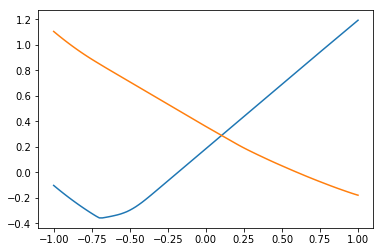

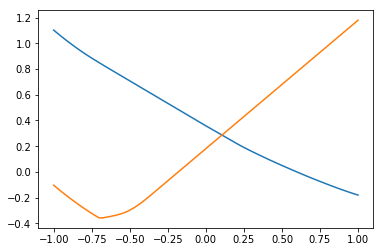

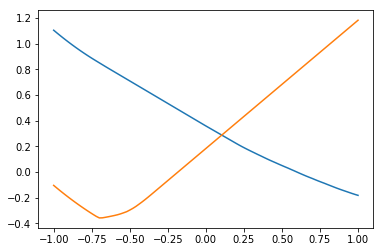

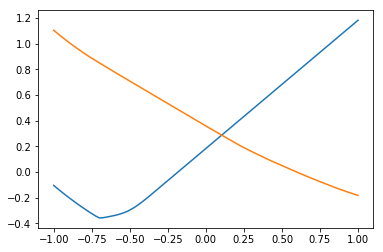

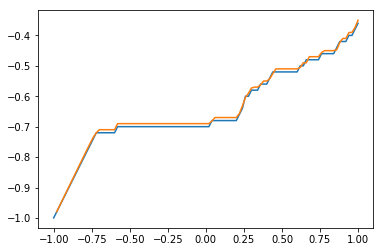

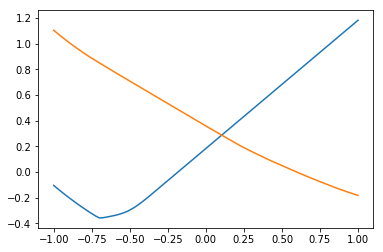

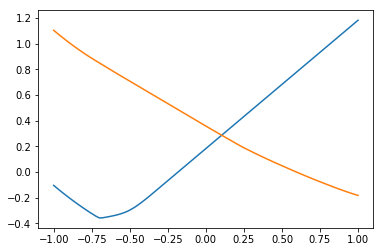

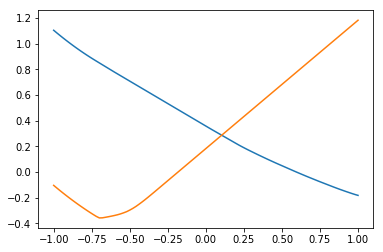

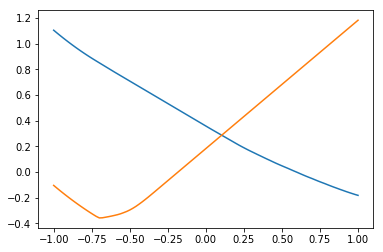

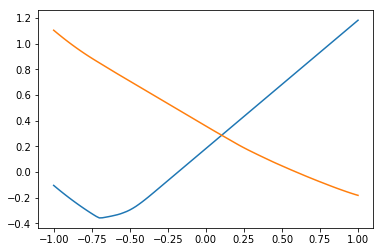

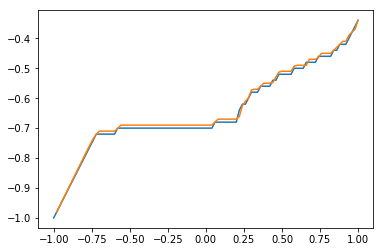

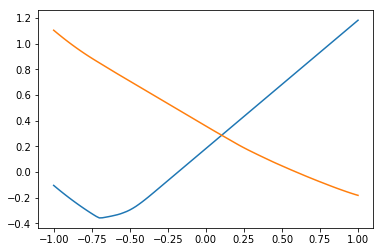

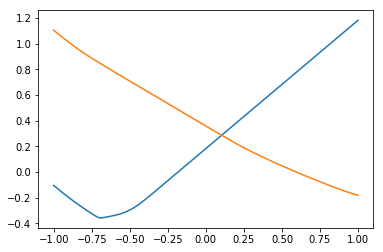

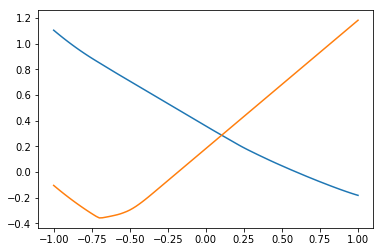

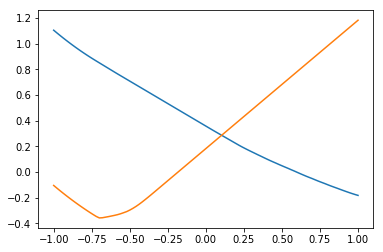

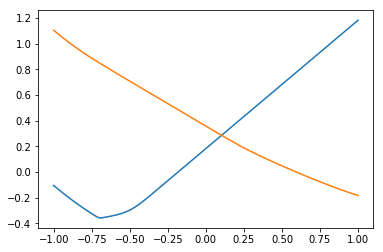

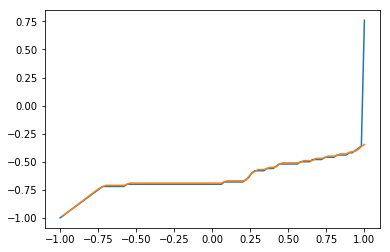

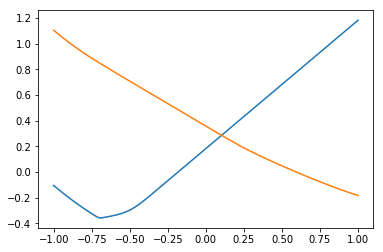

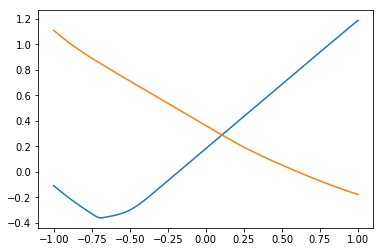

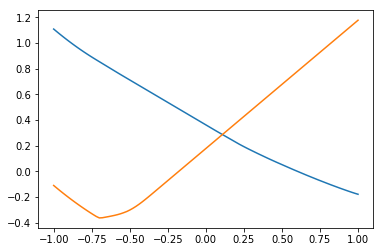

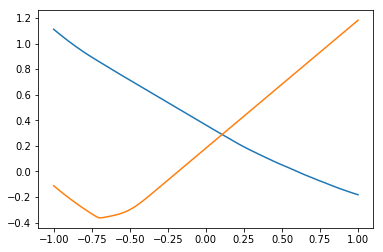

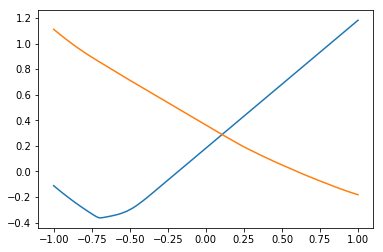

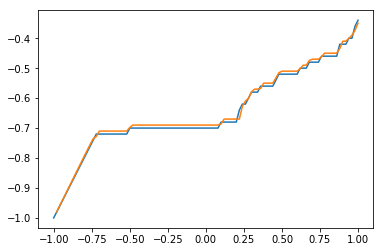

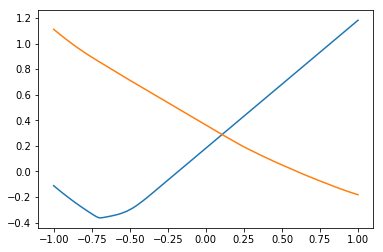

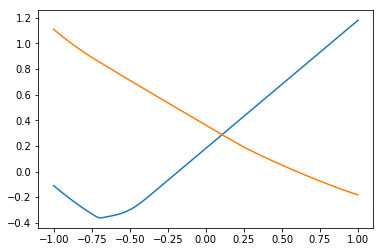

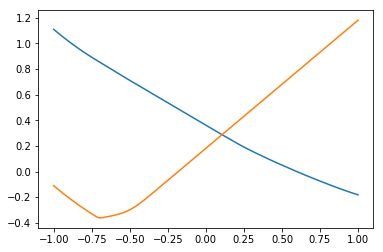

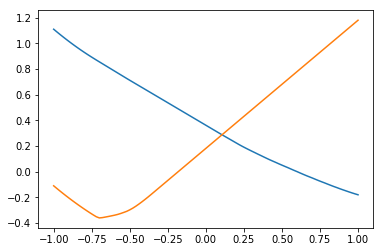

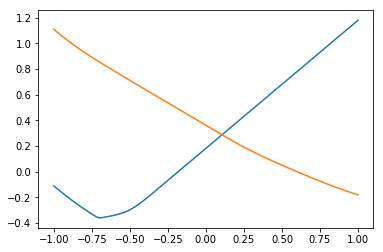

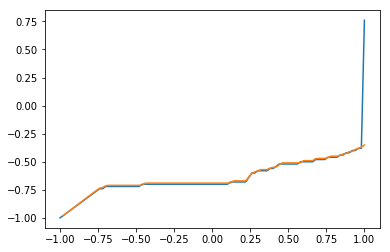

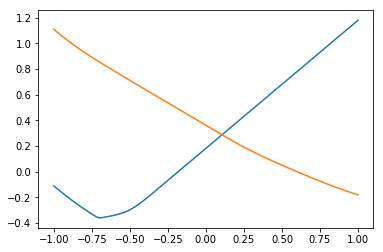

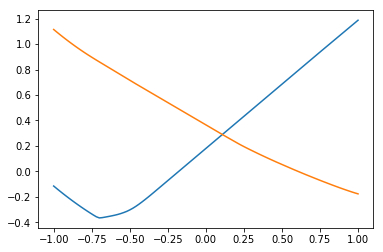

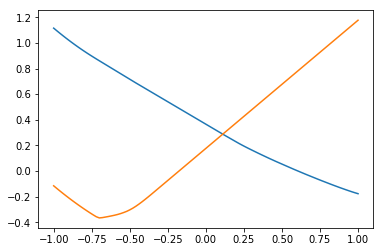

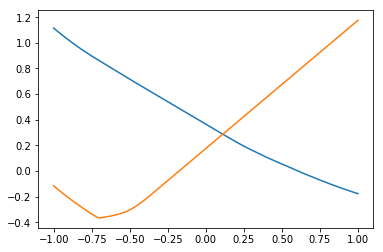

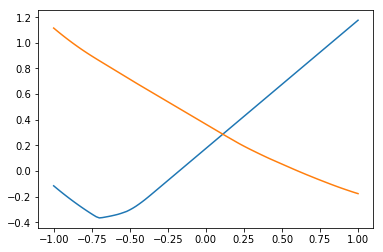

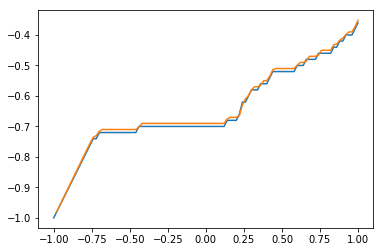

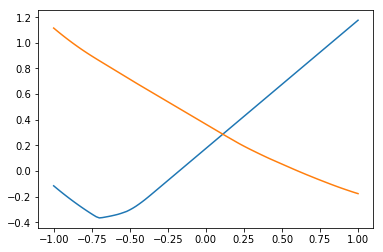

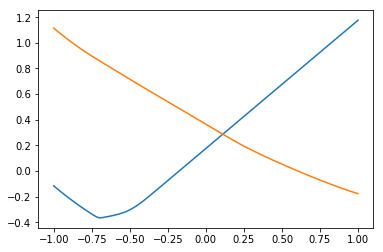

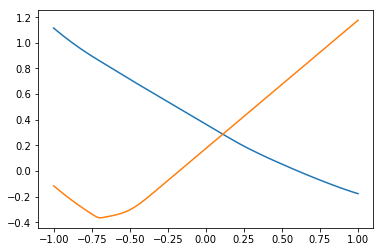

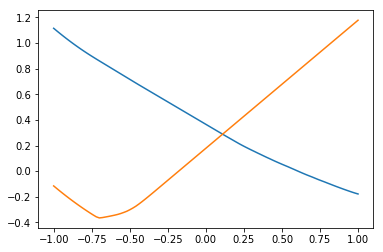

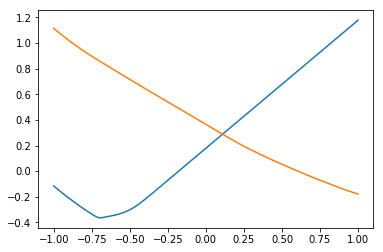

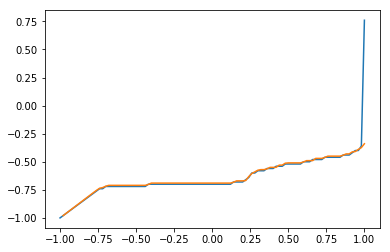

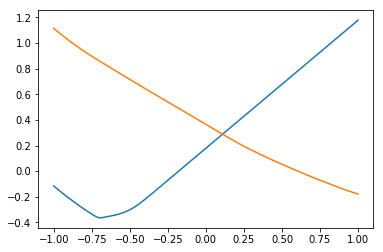

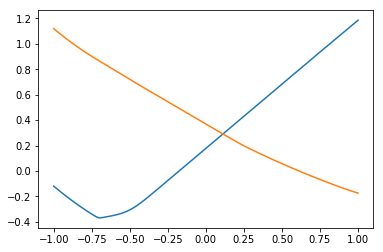

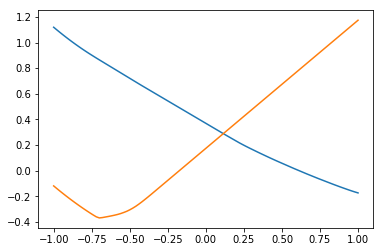

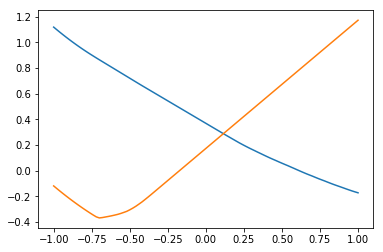

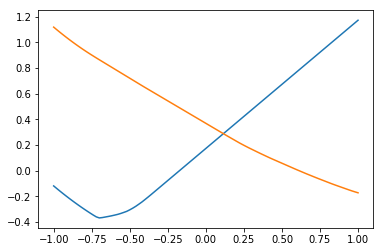

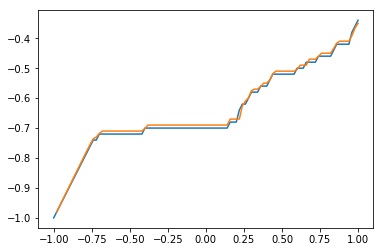

In [16]:
x = np.linspace(-1, 1, 101)

mu = np.exp(-(x - 0.5)**2 * 100)
mu = np.where(x > 0.2, 1., 0.)
mu /= np.sum(mu)
#nu = np.copy(mu[::-1])
#nu = np.exp(-(x + 0.2)**2 * 100) + np.exp(-(x+0.7)**2 * 100)
nu = np.exp(-(x + 0.5)**2 * 100)
nu /= np.sum(nu)
#plt.plot(x, mu)
#plt.plot(x, nu)

phi = np.zeros_like(x)
psi = np.zeros_like(x)

sigma = 8 / np.max(mu) / 4

phi_iopt = np.arange(len(x))
psi_iopt = np.arange(len(x))

for k in range(20):
    
    #plt.plot(x, lap_solve(nu - push_forward(mu, phi_iopt)))
    #plt.plot(x, phi)
    #plt.show()
    _, phi_iopt = c_transform(x, phi)
    phi += sigma * lap_solve(nu - push_forward(mu, phi_iopt))
    psi, _ = c_transform(x, phi)
    
    _, psi_iopt = c_transform(x, psi)
    psi += sigma * lap_solve(mu - push_forward(nu, psi_iopt))
    phi, _ = c_transform(x, psi)
    #plt.plot(x, phi)
    #plt.plot(x, psi)
    
    if k % 1 == 0:
        #plt.plot(x, push_forward(mu, phi_iopt))
        t, phi_iopt = c_transform(x, phi)
        plt.plot(x, x[phi_iopt])
        plt.plot(x[1:], x[1:] - (t[1:] - t[:-1])/(x[1:] - x[:-1]))
        #plt.plot(x[1:], x[1:] - (t[1:] - t[:-1])/(x[1:] - x[:-1]) - x[phi_iopt][1:])
        #plt.plot(x, lap_solve(nu - push_forward(mu, phi_iopt)))
        #plt.plot(x, lap_solve(mu - push_forward(nu, psi_iopt)))
        plt.show()
 
 



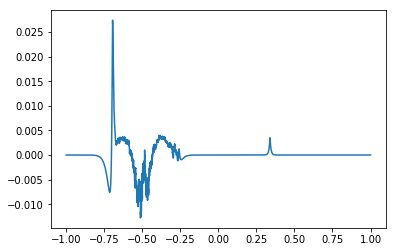

In [488]:
def lap_smooth(f, la):
    """Solves (-\Delta)u = f with Neumann boundary condition on [0,1]. 
    f needs to be given at all nodes including the endpoints. The mean of f is set to zero."""
    # even periodic extension to get cosine series; imaginary part of the result will be zero
    pf = np.concatenate((f, f[-2:0:-1]))
    ff = np.fft.rfft(pf)
    xi = np.linspace(0, 1, len(f))
    N = len(f) - 1
    #ff[0] = 0 # set mean to 0
    ff /= 1 + la * 4 * np.sin(0.5 * np.pi * xi)**2 * N**2
    # perform inverse fft and remove the even periodic extension
    return np.fft.irfft(ff)[:len(f)]

f = push_forward(mu, phi_iopt)
plt.plot(x, (lap_smooth(f, 0.00001) - nu) / np.max(nu))
#plt.plot(x, f)